In [1]:
from Utils import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import os.path


In [2]:
coupling_type = '1JHN'
XY_Data = pd.read_csv(f'{Config.INPUT_XY}/{coupling_type}.csv', index_col=0)

In [3]:
XY_train, XY_Val =  train_test_split(XY_Data, test_size=0.3, random_state=228)
X_val, y_val = build_x_y_data(XY_Val)    

In [4]:
isFilter = False
if isFilter:
    dpOldErr = get_filtered_errors(coupling_type)
    XY_Train_Filtered = get_filtered_xy(XY_train, dpOldErr)
else:
    XY_Train_Filtered = XY_train    
X_train, y_train = build_x_y_data(XY_Train_Filtered)    
    


In [5]:
#X_data, y_data = build_x_y_data(XY_Filtered)
#X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.3, random_state=228)

In [6]:
%time 
categorical_features = [col for col in X_train if col.startswith('atom_')]

#X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.3, random_state=228)
# to record eval results for plotting
model = LGBMRegressor(**Config.LGB_PARAMS, n_estimators=3000, n_jobs = -1)
model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric='mae',
        verbose=100, early_stopping_rounds=1000,
         categorical_feature = categorical_features)

y_pred = model.predict(X_val)
print(mean_absolute_error(y_val, y_pred))
np.log(mean_absolute_error(y_val, y_pred))


Wall time: 0 ns
Training until validation scores don't improve for 1000 rounds.


C:\ProgramFiles\Anaconda\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['atom_2', 'atom_3', 'atom_4', 'atom_5', 'atom_6', 'atom_7', 'atom_8', 'atom_9']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[100]	training's l1: 0.422157	valid_1's l1: 0.542655
[200]	training's l1: 0.325056	valid_1's l1: 0.485674
[300]	training's l1: 0.274937	valid_1's l1: 0.462486
[400]	training's l1: 0.242853	valid_1's l1: 0.451641
[500]	training's l1: 0.221041	valid_1's l1: 0.444291
[600]	training's l1: 0.204872	valid_1's l1: 0.43951
[700]	training's l1: 0.192632	valid_1's l1: 0.435917
[800]	training's l1: 0.182768	valid_1's l1: 0.433922
[900]	training's l1: 0.175153	valid_1's l1: 0.43234
[1000]	training's l1: 0.168547	valid_1's l1: 0.431185
[1100]	training's l1: 0.163214	valid_1's l1: 0.43012
[1200]	training's l1: 0.158722	valid_1's l1: 0.429248
[1300]	training's l1: 0.154949	valid_1's l1: 0.428635
[1400]	training's l1: 0.151728	valid_1's l1: 0.428076
[1500]	training's l1: 0.149012	valid_1's l1: 0.427763
[1600]	training's l1: 0.146526	valid_1's l1: 0.427378
[1700]	training's l1: 0.144485	valid_1's l1: 0.427126
[1800]	training's l1: 0.142683	valid_1's l1: 0.426846
[1900]	training's l1: 0.141045	valid_1's

-0.9118497357426892

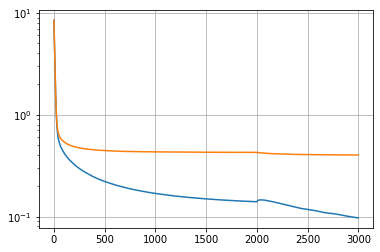

In [7]:
eval_results = model.evals_result_
l1 = eval_results["training"]["l1"]
plt.plot(l1)

valid = eval_results["valid_1"]["l1"]
plt.plot(valid)

#ax.set_yticks(np.linspace(100, 1000, 10))
plt.yscale('log')
plt.grid(True)

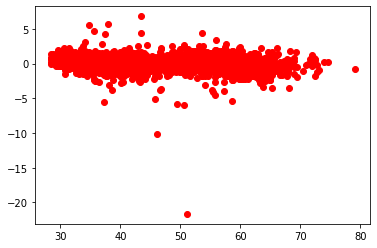

In [8]:
plt.plot(y_val, y_pred- y_val, 'ro')

In [9]:
(y_pred- y_val).describe()

count    7252.000000
mean       -0.006066
std         0.682985
min       -21.666310
25%        -0.231322
50%         0.011497
75%         0.255615
max         6.824610
Name: scalar_coupling_constant, dtype: float64